In [472]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ilayaraja07/data-cleaning-feature-imputation")

print("Path to dataset files:", path)

Path to dataset files: /Users/jialing/.cache/kagglehub/datasets/ilayaraja07/data-cleaning-feature-imputation/versions/1


In [473]:
import os

# list all csv files in the downloaded path
files = os.listdir(path)
print(files) # confirms file names

['Students_Performance_knn.csv', 'Students_Performance_mv.csv', 'Wine_Quality.csv']


In [474]:
import pandas as pd
df1 = pd.read_csv(os.path.join(path, 'Students_Performance_knn.csv'))
df2 = pd.read_csv(os.path.join(path, 'Students_Performance_mv.csv'))
df3 = pd.read_csv(os.path.join(path, 'Wine_Quality.csv'))

df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [475]:
# select categorical columns
cat_cols = df1.select_dtypes(include="object").columns

# get unique counts per categorical column (this returns a Series)
print(df1[cat_cols].nunique())


gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64


In [476]:
for col in cat_cols:
    print(f"{col} : {df1[col].unique()}")
# tells u the unique values in each cols

gender : ['female' 'male']
race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced' nan]
test preparation course : ['none' 'completed']


In [477]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        975 non-null    object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [478]:
df1.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                          25
test preparation course         0
math score                      0
reading score                   0
writing score                   0
dtype: int64

In [479]:
# Locate null values
df1.loc[df1['lunch'].isnull()]

from feature_engine.imputation import CategoricalImputer
# this imputes missing values in categorical columns with mode.

imputer = CategoricalImputer(
    imputation_method='frequent',  # or 'missing'
    fill_value='Missing',          # used if method is 'missing'
    variables=None,                # columns to apply it to (None = applied to all categorical cols automatically)
)

df1_imputed = imputer.fit_transform(df1) 

In [480]:
import sys
print(sys.executable)

/opt/anaconda3/envs/anaconda-2025.06-py3.11/bin/python


In [481]:
df1_imputed.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [482]:
# Clean text data and remove white spaces for categorical columns
for i in df1_imputed.select_dtypes(include = 'object').columns:
    df1_imputed[i] = df1_imputed[i].astype(str).str.strip()


In [483]:
# Clean text data and ensures 1 white space between multiple words for categorical cols, strips white spaces at start and end too
import re

for i in df1_imputed.select_dtypes(include='object').columns:
    df1_imputed[i] = df1_imputed[i].apply(
        lambda x : re.sub(r'\s+', ' ', 
                          x.strip().lower()) if isinstance(x, str) else x)

# \s : whitespace, + : one or more of the previous
# re.sub(r'old', 'new to replace')
# replace one or more white spaces to single spaces
# x.strip() remove trailing white spaces
# . lower() makes all lower
# only if x is a str, else leave it
# re.sub(pattern, replacement, string, count=0, flags=0)
# pattern = r'regex'
# string : apply to which string? state.

In [484]:
# Perhaps, it would be better to drop missing values.
df1_dropped_na = df1.dropna()
df1_dropped_na.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [485]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               989 non-null    object
 2   parental level of education  979 non-null    object
 3   lunch                        988 non-null    object
 4   test preparation course      996 non-null    object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [486]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        975 non-null    object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [487]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [488]:
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [489]:
# it seems like df1 and df2 are same, one has values the other doesnt

df_merged = df1.combine_first(df2)
# whereever df1 has a missing values, it will look from df2
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [490]:
# Data viz with merged
import matplotlib.pyplot as plt
import seaborn as sns

# For prettier plots
sns.set(style="whitegrid")
sns.set_palette("muted")

numerical_cols = df_merged.select_dtypes(include='number').columns
# df_merged.select_dtypes(include='number') returns a df
# .columns returns a list

In [491]:
df_merged.select_dtypes(include='number')

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [492]:
df_merged.select_dtypes(include='number').columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

How are test scores for math, reading, writing distributed?

TypeError: Could not convert string 'nonecompletednonenonenonenonecompletednonecompletednonenonenonenonecompletednonenonenonenonecompletednonenonecompletednonenonecompletednonenonenonenonenonenonenonenonenonenonecompletednonenonecompletednonenonenonenonecompletednonenonecompletednonecompletedcompletednonecompletednonenonecompletednonecompletednonecompletednonecompletednonenonenonenonenonenonenonenonenonecompletedcompletednonenonenonenonenonecompletedcompletednonenonenonecompletednonenonenonenonenonenonenonenonenonenonecompletednonecompletedcompletedcompletednonenonenonecompletednonecompletedcompletednonenonecompletednonenonecompletednonenonenonecompletednonenonenonenonenonecompletedcompletedcompletednonenonenonenonecompletednonenonenonecompletedcompletedcompletedcompletednonecompletednonenonecompletednonenonecompletednonenonenonenonenonecompletedcompletedcompletednonecompletednonenonecompletedcompletednonecompletednonecompletedcompletednonenonenonecompletedcompletedcompletedcompletedcompletedcompletednonenonenonecompletedcompletedcompletedcompletedcompletedcompletedcompletednonenonenonecompletedcompletednonecompletednonenonenonecompletednonecompletedcompletednonecompletednonenonenonecompletednonenonenonenonecompletednonecompletednonenonecompletednonenonecompletedcompletedcompletedcompletednonenonecompletedcompletednonenonenonecompletednonenonenonenonecompletednonenonenonenonecompletednonenonecompletednonenonecompletednonenonenonenonenonenonecompletednonenonecompletednonecompletednonenonenonenonecompletednonecompletedcompletedcompletednonenonenonenonenonenonecompletednonenonenonenonenonecompletednonecompletedcompletednonenonenonenonenonecompletednonecompletedcompletednonenonecompletednonenonecompletednonecompletednonecompletedcompletedcompletednonecompletednonecompletednonecompletednonecompletednonenonenonenonenonecompletedcompletedcompletednonecompletednonenonenonecompletednonenonenonenonenonenonenonecompletednonenonenonecompletednonenonenonecompletednonenonecompletednonenonecompletedcompletednonenonenonecompletednonenonenonenonecompletednonenonenonenonecompletednonenonenonecompletednonenonenonecompletedcompletednonenonenonenonecompletednonecompletednonenonenonecompletednonenonenonecompletednonenonenonenonenonenonenonenonecompletednonenonecompletedcompletednonenonenonenonenonecompletednonenonecompletednonenonecompletednonecompletedcompletedcompletedcompletednonecompletedcompletednonecompletednonenonecompletedcompletedcompletedcompletedcompletednonenonenonenonenonenonenonenonenonenonenonecompletednonenonenonecompletedcompletednonenonenonenonecompletednonecompletednonenonecompletednonenonenonenonenonenonenonenonecompletednonenonenonenonecompletednonenonecompletedcompletednonecompletednonecompletednonecompletedcompletedcompletednonenonenonecompletednonenonenonenonenonenonenonecompletedcompletednonenonenonenonenonecompletednonecompletednonenonenonecompletednonecompletednonenonenonenonenonenonenonenonenonecompletedcompletedcompletednonecompletedcompletedcompletednonenonenonenonecompletednonecompletednonenonenonecompletednonecompletedcompletedcompletedcompletedcompletednonecompletedcompletedcompletedcompletednonenonenonecompletedcompletedcompletednonenonenonecompletednonenonenonenonecompletednonenonenonecompletednonecompletedcompletednonenonecompletedcompletednonenonecompletednonenonecompletednonecompletedcompletednonecompletednonenonenonenonecompletednonenonenonenonenonenonenonenonenonenonecompletedcompletednonenonenonenonenonenonenonenonecompletednonenonenonenonenonecompletednonecompletednonenonenonenonenonenonecompletednonenonecompletedcompletednonecompletedcompletednonenonecompletednonenonecompletednonenonenonecompletedcompletednonenonenonecompletednonecompletednonecompletednonenonenonecompletedcompletedcompletedcompletedcompletednonenonenonenonenonenonenonenonenonenonenonecompletedcompletednonenonecompletednonenonenonecompletedcompletedcompletedcompletedcompletednonenonenonenonenonecompletedcompletedcompletedcompletednonenonenonenonenonecompletednonenonenonecompletednonecompletednonecompletednonecompletednonecompletednonenonenonenonecompletedcompletedcompletednonenonecompletedcompletedcompletedcompletednonecompletednonecompletedcompletednonenonecompletedcompletedcompletednonenonecompletednonecompletednonenonenonenonecompletednonenonenonenonenonecompletednonenonenonenonenonecompletedcompletednonecompletedcompletednonenonenonecompletedcompletedcompletednonenonecompletednonenonenonecompletedcompletednonenonenonenonecompletednonenonenonenonenonecompletedcompletednonenonecompletedcompletedcompletedcompletednonenonenonenonenonenonenonecompletednonecompletednonenonenonenonecompletedcompletednonenonenonenonenonenonenonenonenonenonecompletedcompletednonecompletednonecompletednonenonecompletednonecompletednonenonenonecompletednonecompletednonenonecompletednonecompletednonecompletednonecompletedcompletednonenonenonecompletedcompletedcompletednonecompletednonenonenonenonenonenonenonenonenonenonenonecompletednonenonenonecompletedcompletednonecompletednonenonecompletednonenonecompletedcompletednonenonenonenonenonenonenonecompletedcompletednonenonenonecompletedcompletednonenonenonecompletednonenonecompletednonenonenonecompletedcompletedcompletednonenonecompletedcompletednonenonenonecompletednonecompletednonenonecompletedcompletednonenonecompletednonecompletedcompletednonenonenonenonenonecompletednonecompletedcompletednonecompletednonecompletedcompletedcompletednonenonenonecompletedcompletedcompletednonenonecompletednonenonenonenonecompletedcompletednonecompletednonecompletednonenonenonenonenonenonenonenonenonecompletednonenonecompletednonenonenonenonecompletedcompletednonenonecompletedcompletednonecompletednonenonenonecompletedcompletednonenonenonecompletednonecompletedcompletedcompletednonenonenonecompletednonecompletedcompletednone' to numeric

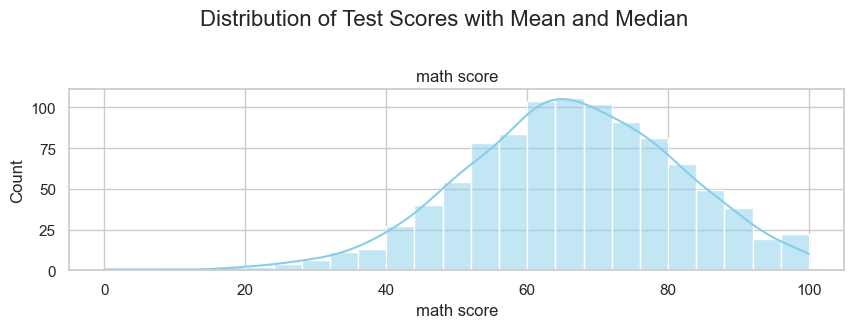

In [493]:
plt.figure(figsize=(10, 8))  # taller figure to accommodate all rows
plt.suptitle('Distribution of Test Scores with Mean and Median', fontsize=16)

for i, a in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)  # multiple rows, 1 col
    sns.histplot(data=df_merged, x=a, kde=True, color ='skyblue')
    plt.title(a)
    # Calculate mean and median
    mean_val = df_merged[col].mean()
    median_val = df_merged[col].median()
    
    # Draw vertical lines
    plt.axvline(x=mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    plt.axvline(x=median_val, color='green', linestyle='-', label=f'Median: {median_val:.1f}')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave room for suptitle
plt.show()


Since mean>median for all scores, data is slightly right skewed,  but test scores are fairly close to being normally distributed (mean=median=mode).

For deeper testing for normality, we can use statistical tests.
- Shapiro-Wilk test (Null Ho : normally dist ==> rej if p-value < 0.05)
- Kolmogorov-Smirnov test
- QQ plots for visual inspection

In [ ]:
from scipy.stats import shapiro

for col in numerical_cols:
    stat, p = shapiro(df_merged[col])
    print(f"{col}: Statistic = {stat:.3f}, p-value = {p:.3f} → {'Normal ✅' if p > 0.05 else 'Not Normal ❌'}")


math score: Statistic = 0.993, p-value = 0.000 → Not Normal ❌
reading score: Statistic = 0.993, p-value = 0.000 → Not Normal ❌
writing score: Statistic = 0.992, p-value = 0.000 → Not Normal ❌


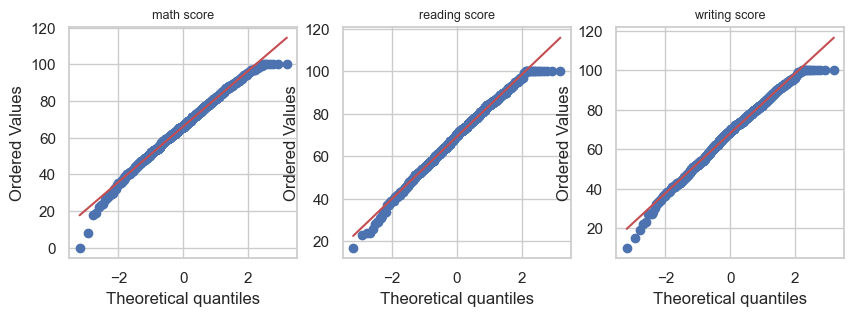

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for i , col in enumerate(numerical_cols):
    stats.probplot(df_merged[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"{col}", fontsize=9)
    axes[i].grid(True)

# Data lies roughly on the straight diagonal lines, data is likely normal, except the tail values.


What is the distribution count of categorical variables like?

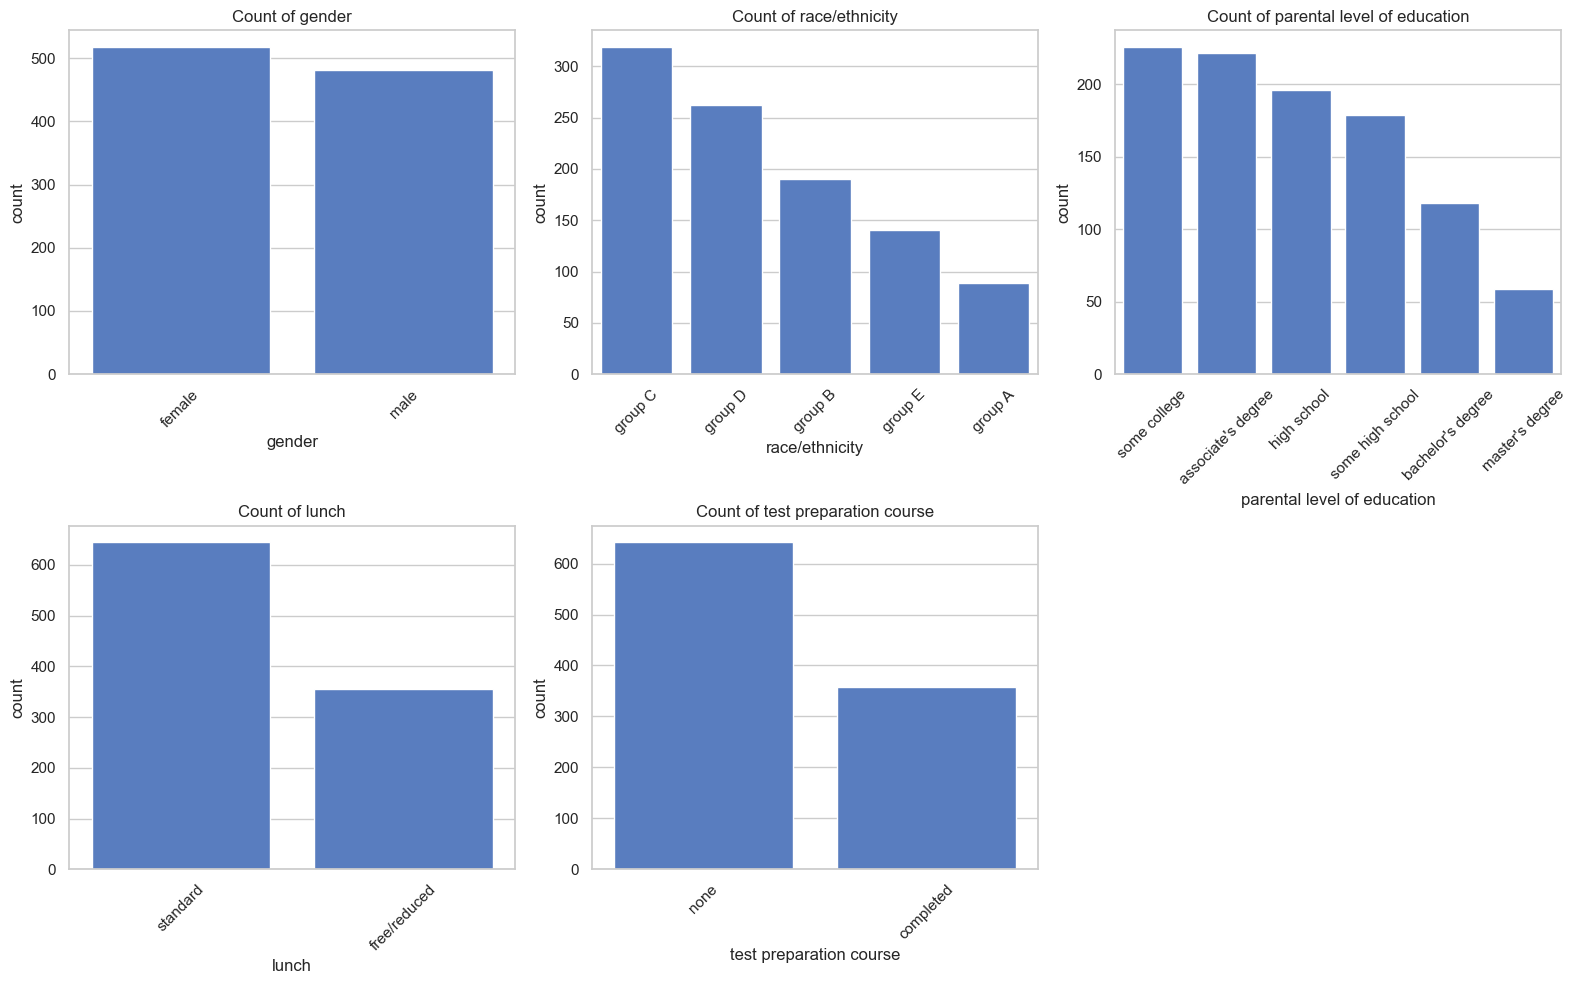

In [ ]:
# Visualize cat cols
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten() # takes a 2D array and converts it into 1D, which might be needed when looping subplots

for i, col in enumerate(cat_cols):
    sns.countplot(data=df_merged, x=col, order=df_merged[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# remove empty subplots
if len(cat_cols) < len(axes): #len(axes) returns total no. subplots
    for j in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[j]) # .delaxes removes a subplot, from axes[5]

plt.tight_layout()
plt.show()


How do categorical variables affect test scores?

In [ ]:
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
num_cols = ['math score', 'reading score', 'writing score']  # your test scores

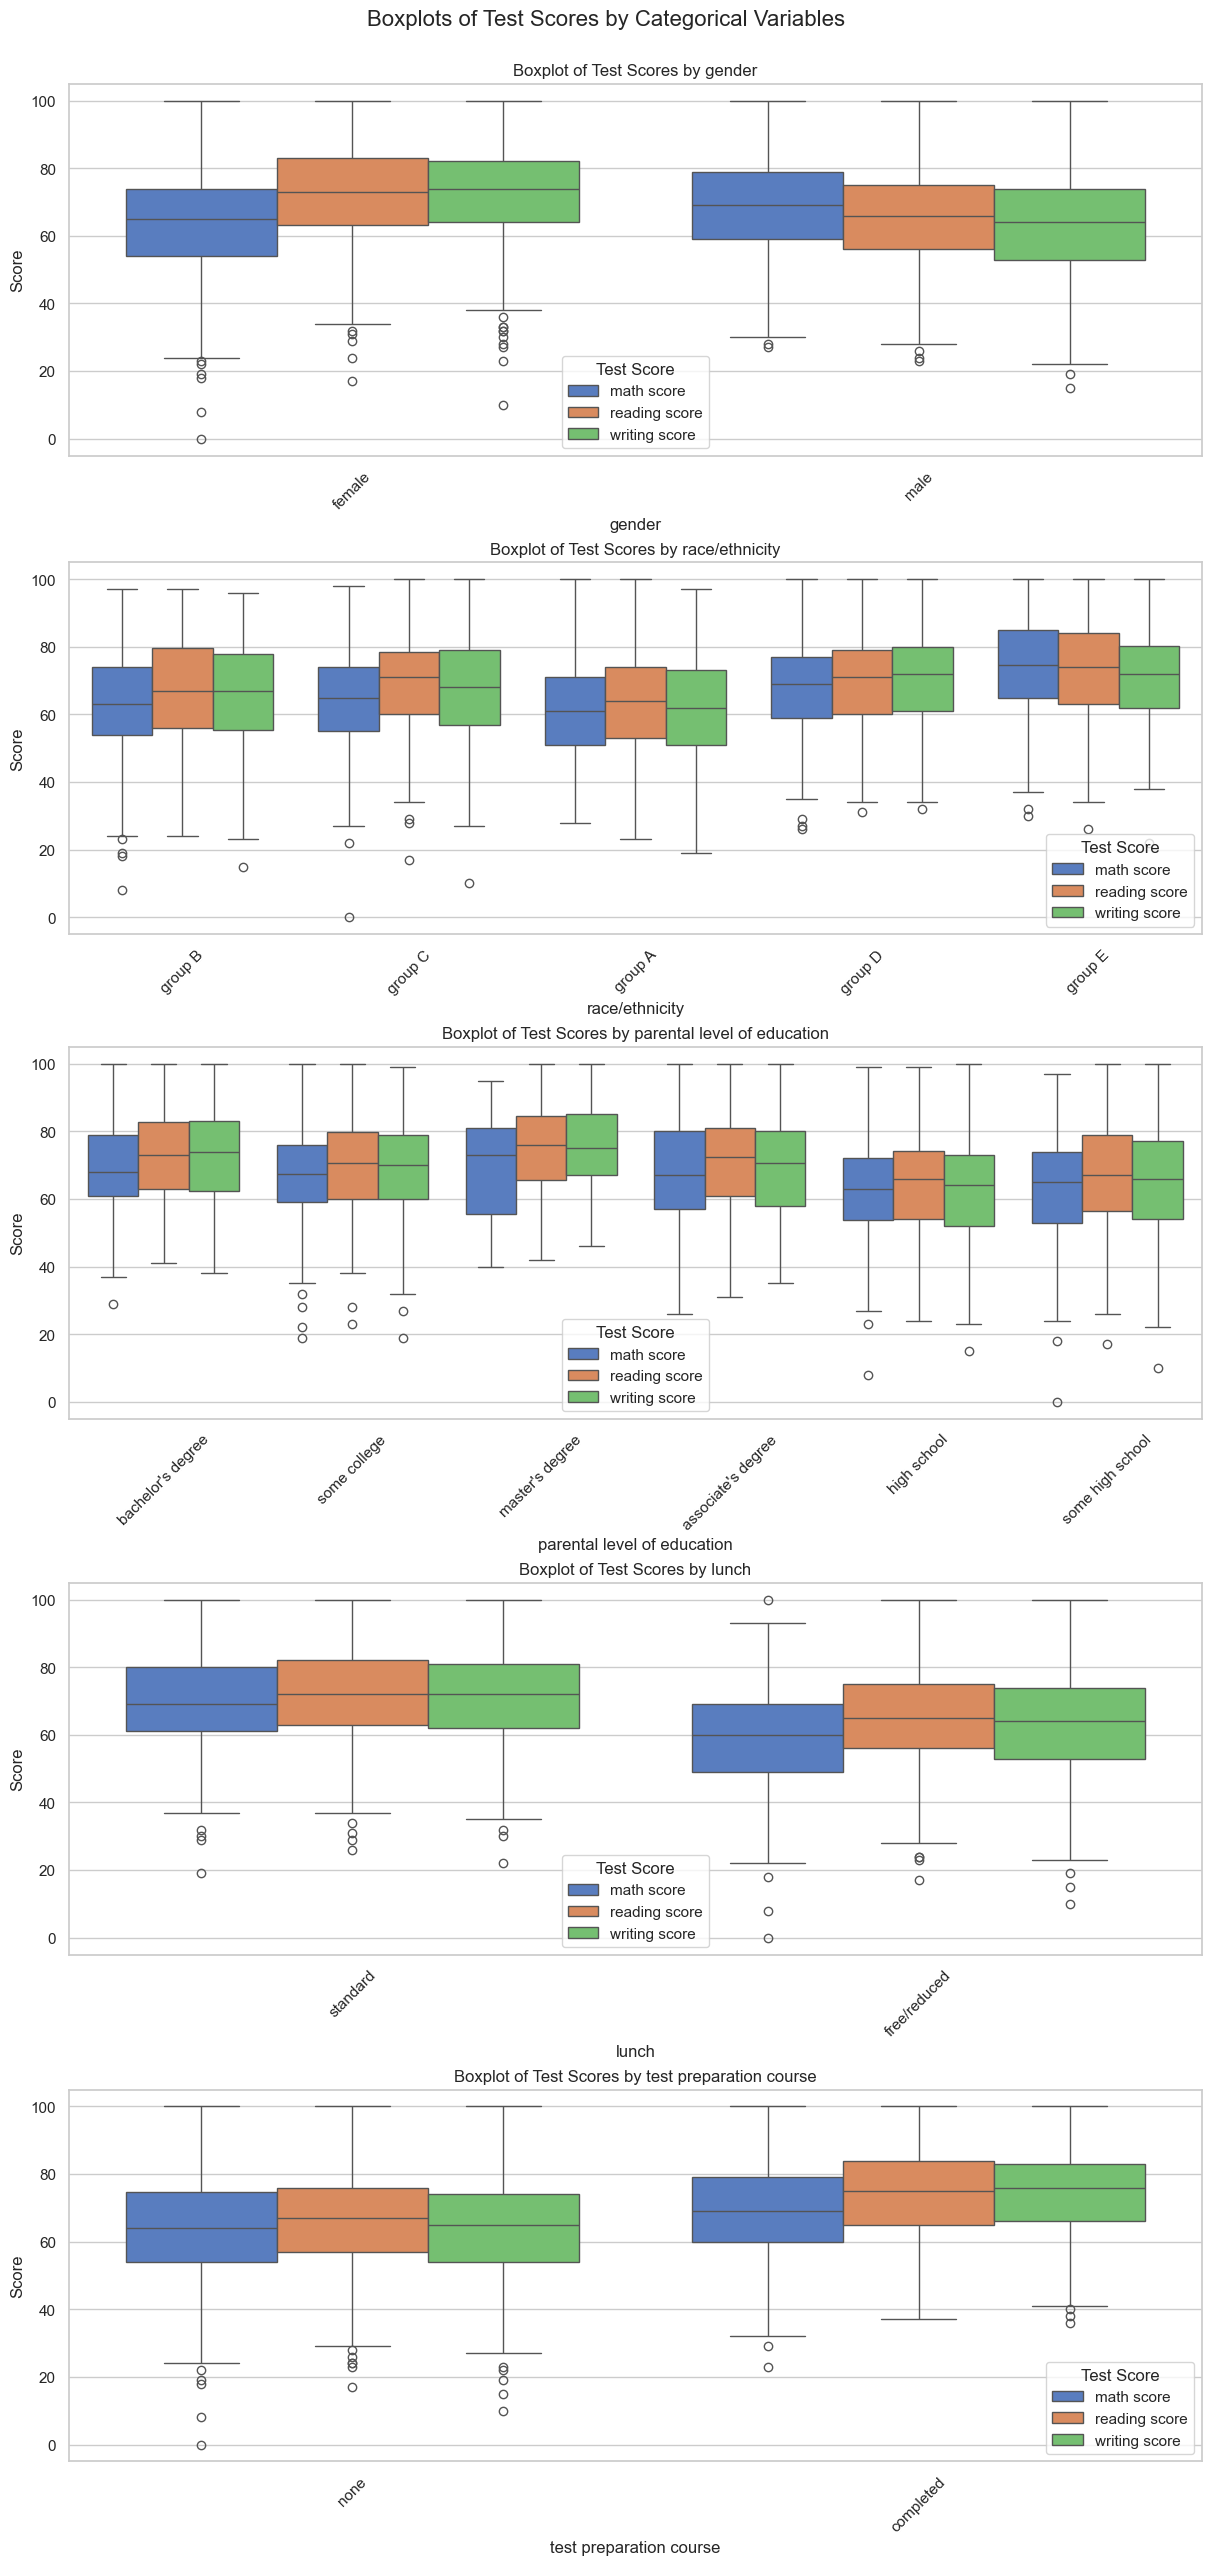

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare categorical and numerical columns
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
num_cols = ['math score', 'reading score', 'writing score']

# Function to plot multiple numerical columns side-by-side in one subplot
def plot_multiple_numerical_by_cat(ax, df, cat_col, num_cols, plot_func, title):
    # Melt the dataframe to long format for easy seaborn plotting
    df_melt = df.melt(id_vars=cat_col, value_vars=num_cols, var_name='Test Score', value_name='Score')
    plot_func(data=df_melt, x=cat_col, y='Score', hue='Test Score', ax=ax)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

# Boxplots figure
fig_box, axes_box = plt.subplots(len(cat_cols), 1, figsize=(12, 5 * len(cat_cols)), constrained_layout=True)
for ax, cat_col in zip(axes_box, cat_cols):
    plot_multiple_numerical_by_cat(ax, df_merged, cat_col, num_cols, sns.boxplot,
                                  f'Boxplot of Test Scores by {cat_col}')

plt.suptitle('Boxplots of Test Scores by Categorical Variables', fontsize=16, y=1.02)
plt.show()


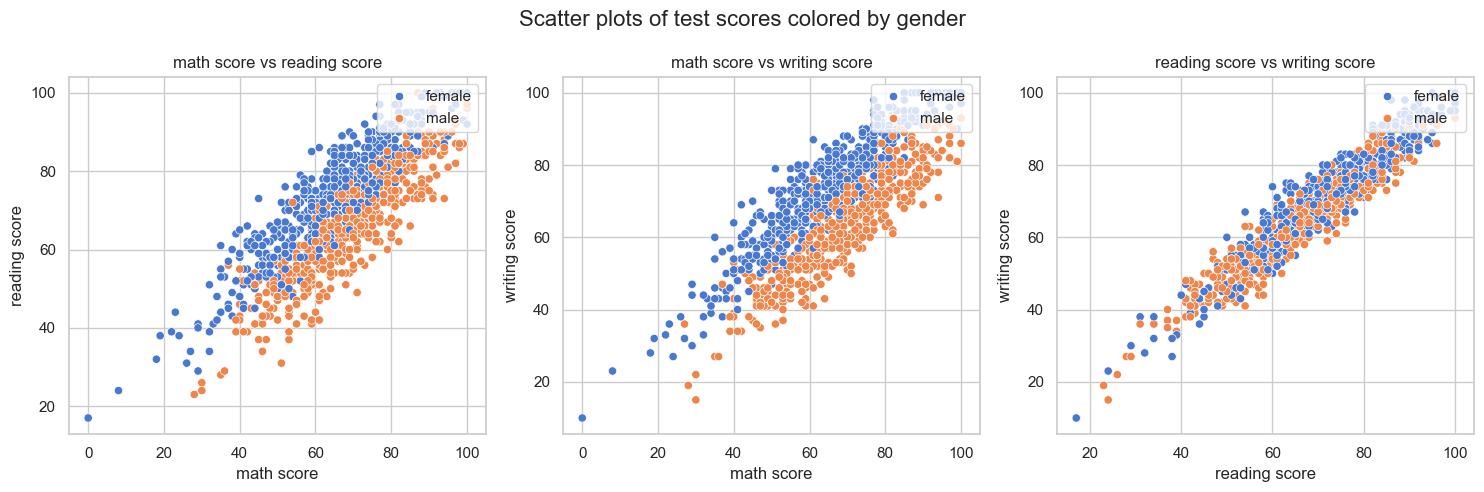

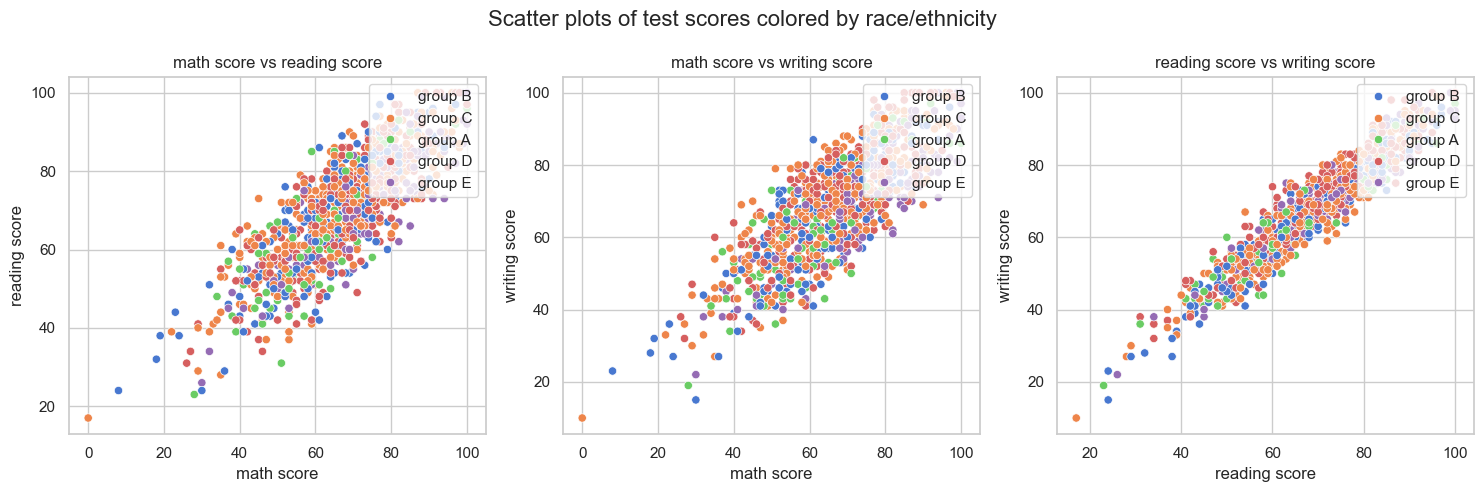

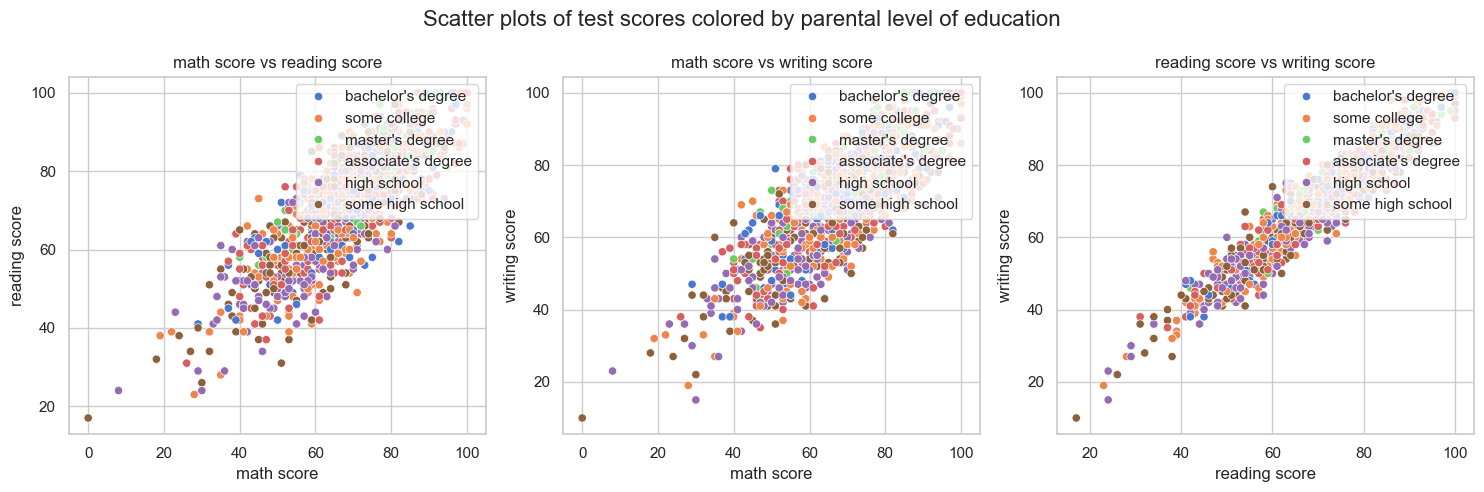

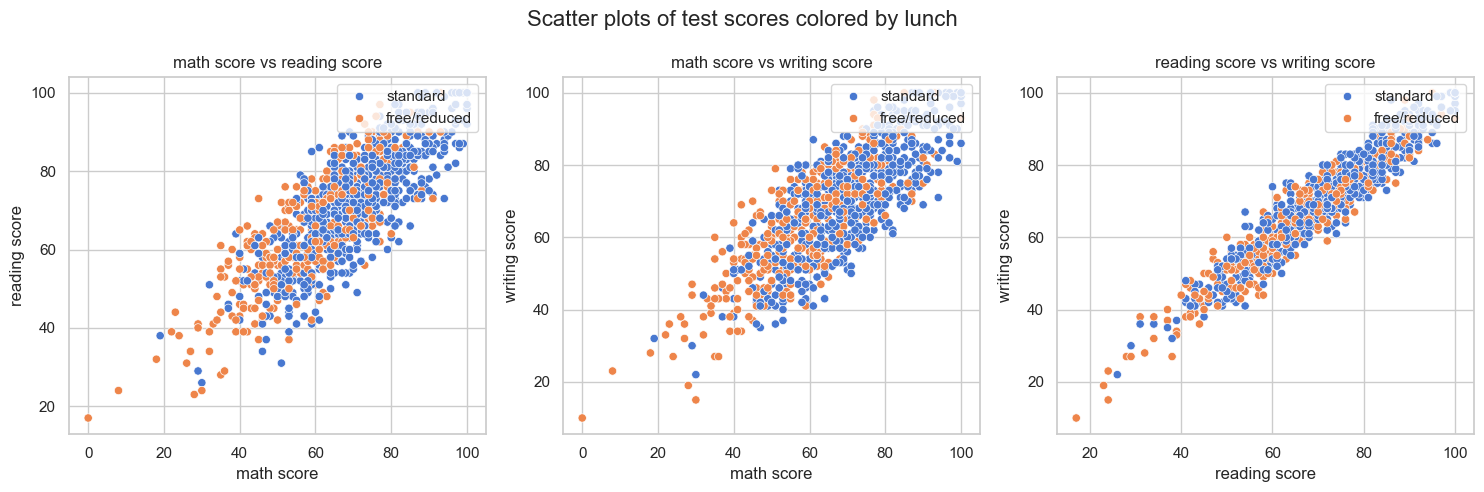

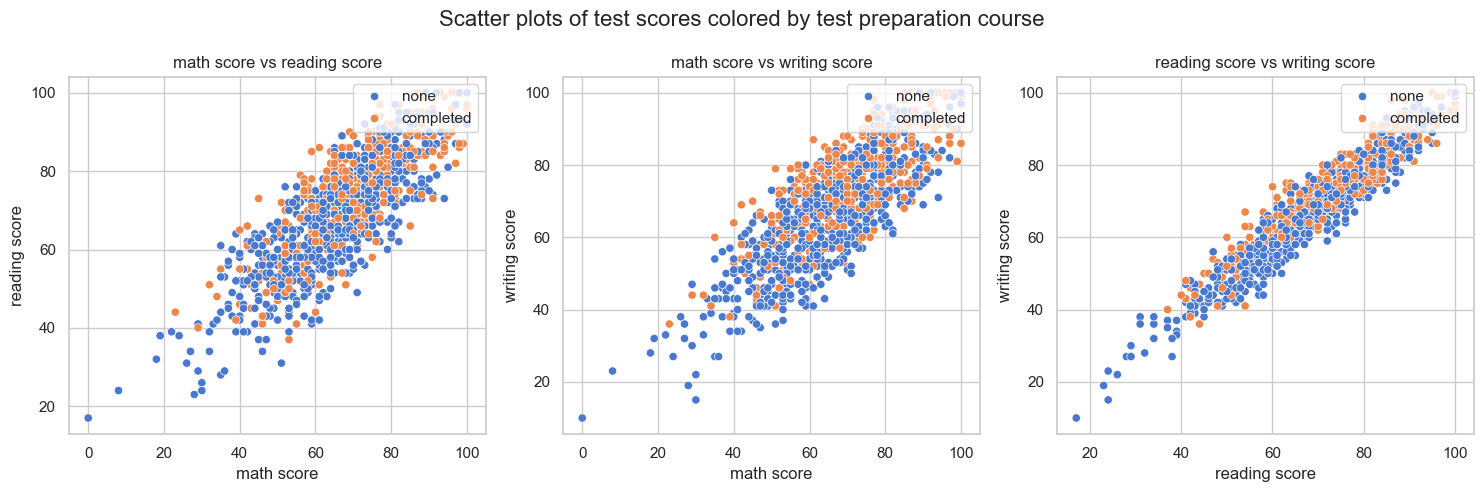

In [ ]:
from itertools import combinations

for cat_col in cat_cols:
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Scatter plots of test scores colored by {cat_col}', fontsize=16)

    pairs = list(combinations(num_cols, 2))
    for i, (x_col, y_col) in enumerate(pairs, 1):
        plt.subplot(1, len(pairs), i)
        sns.scatterplot(data=df_merged, x=x_col, y=y_col, hue=cat_col)
        plt.title(f'{x_col} vs {y_col}')
        plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


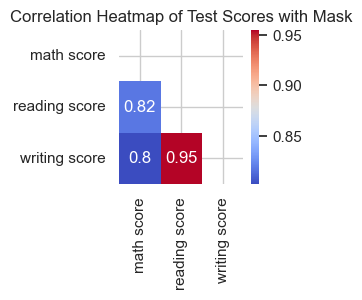

In [ ]:
import numpy as np

plt.figure(figsize=(2,2))
corr = df_merged[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # mask upper triangle

sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap of Test Scores with Mask')
plt.show()


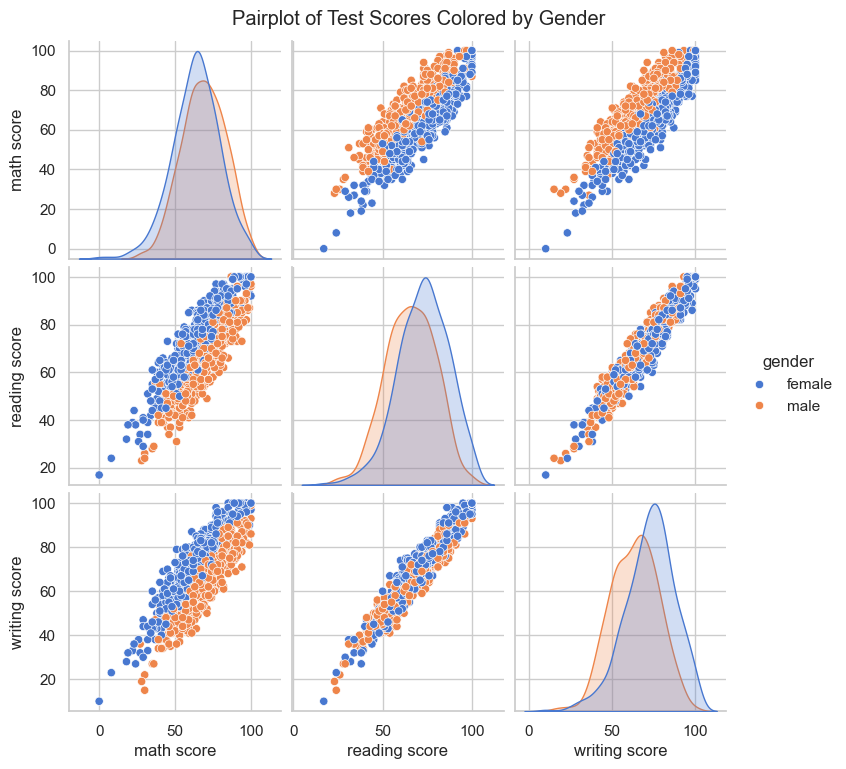

In [ ]:
sns.pairplot(df_merged, vars=num_cols, hue='gender')  # change hue to any cat_col
plt.suptitle('Pairplot of Test Scores Colored by Gender', y=1.02)
plt.show()


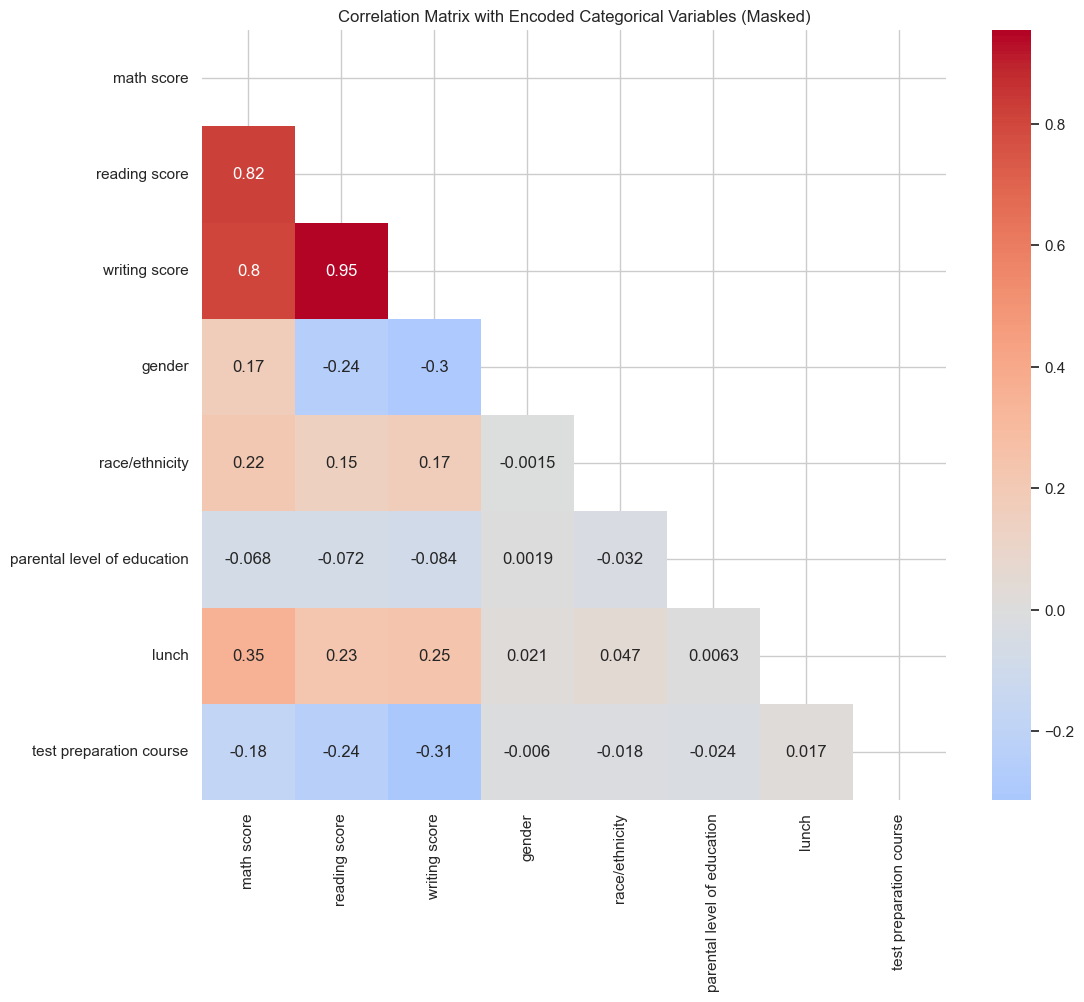

In [ ]:
# Label encode all categorical columns (simplest way)
from sklearn.preprocessing import LabelEncoder

# Copy and encode categorical variables
df_encoded = df_merged.copy()
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Combine numerical and encoded categorical columns
all_cols = num_cols + cat_cols
corr = df_encoded[all_cols].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap with mask
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title('Correlation Matrix with Encoded Categorical Variables (Masked)')
plt.show()

In [ ]:
import scipy.stats as stats

alpha = 0.05  # significance level

cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
num_cols = ['math score', 'reading score', 'writing score']

for cat_col in cat_cols:
    print(f"\nEffect of '{cat_col}' on test scores:")
    for num_col in num_cols:
        categories = df_merged[cat_col].dropna().unique()
        groups = [df_merged[df_merged[cat_col] == cat][num_col].dropna() for cat in categories]
        
        if all(len(group) > 1 for group in groups):
            f_stat, p_val = stats.f_oneway(*groups)
            reject = "Reject H0 (means differ)" if p_val < alpha else "Fail to reject H0 (means similar)"
            print(f"  {num_col}: F={f_stat:.2f}, p={p_val:.4f} -> {reject}")
        else:
            print(f"  {num_col}: Not enough data in all groups for ANOVA")

print("""
Explanation:
- F-statistic: Measures ratio of variance **between groups** to variance **within groups**. 
  Larger F suggests group means differ more than random chance.
- p-value: Probability of observing this F (or more extreme) if the null hypothesis (all means equal) is true.
- If p < 0.05, we reject null hypothesis, concluding at least one group mean differs significantly.
- Null Ho : No difference, any difference is due to random chance or noise.
""")



Effect of 'gender' on test scores:
  math score: F=28.98, p=0.0000 -> Reject H0 (means differ)
  reading score: F=63.35, p=0.0000 -> Reject H0 (means differ)
  writing score: F=99.59, p=0.0000 -> Reject H0 (means differ)

Effect of 'race/ethnicity' on test scores:
  math score: F=14.59, p=0.0000 -> Reject H0 (means differ)
  reading score: F=5.62, p=0.0002 -> Reject H0 (means differ)
  writing score: F=7.16, p=0.0000 -> Reject H0 (means differ)

Effect of 'parental level of education' on test scores:
  math score: F=6.52, p=0.0000 -> Reject H0 (means differ)
  reading score: F=9.29, p=0.0000 -> Reject H0 (means differ)
  writing score: F=14.44, p=0.0000 -> Reject H0 (means differ)

Effect of 'lunch' on test scores:
  math score: F=140.12, p=0.0000 -> Reject H0 (means differ)
  reading score: F=55.52, p=0.0000 -> Reject H0 (means differ)
  writing score: F=64.16, p=0.0000 -> Reject H0 (means differ)

Effect of 'test preparation course' on test scores:
  math score: F=32.54, p=0.0000 ->

So, we can conclude that test scores are indeed affected by ...
- race/ethnicity
- parental level of education
- lunch
- test prep course

Can we quanity this?

In [ ]:
import statsmodels.api as sm
import statsmodels.api as sm

targets = ['math score', 'reading score', 'writing score']

for y_col in targets:
    print(f"\nLinear Regression Results for {y_col}:\n")
    
    X = df_encoded[all_cols]
    y = df_encoded[y_col]
    
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    print(model.summary())




Linear Regression Results for math score:

                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.549e+30
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:15:50   Log-Likelihood:                 29003.
No. Observations:                1000   AIC:                        -5.799e+04
Df Residuals:                     991   BIC:                        -5.794e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm

def interpret_ols(df_encoded, targets, predictors, filename="ols_interpretation.txt"):
    with open(filename, "w") as f:
        for y_col in targets:
            f.write(f"=== Regression Interpretation for {y_col} ===\n\n")

            # Prepare predictors, exclude the dependent var itself
            cols = [col for col in predictors if col != y_col]
            X = df_encoded[cols]
            y = df_encoded[y_col]

            X = sm.add_constant(X)
            model = sm.OLS(y, X).fit()

            f.write(f"Model R-squared: {model.rsquared:.3f}\n\n")

            for var, coef, p in zip(model.params.index, model.params.values, model.pvalues):
                if var == 'const':
                    continue
                significance = "statistically significant" if p < 0.05 else "not statistically significant"
                direction = "increases" if coef > 0 else "decreases"
                effect_size = abs(coef)
                
                f.write(f"- A one unit increase in **{var}** {direction} the {y_col} by approximately {effect_size:.3f} points, ")
                f.write(f"and this effect is {significance} (p = {p:.4f}).\n")

            f.write("\n" + "="*80 + "\n\n")

    print(f"Interpretation report saved to {filename}")


In [ ]:
interpret_ols(df_encoded, num_cols, all_cols)


Interpretation report saved to ols_interpretation.txt


In [ ]:
df_encoded['mean_score'] = df_encoded[['math score', 'reading score', 'writing score']].mean(axis=1)

def ols_report_mean(df_encoded, predictors):
    y = df_encoded['mean_score']
    X = df_encoded[predictors]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

def ols_interpretation_mean(df_encoded, predictors, filename="ols_interpretation_mean.txt"):
    y_col = 'mean_score'
    with open(filename, "w") as f:
        f.write(f"=== Regression Interpretation for {y_col} ===\n\n")

        X = df_encoded[predictors]
        y = df_encoded[y_col]

        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()

        f.write(f"Model R-squared: {model.rsquared:.3f}\n\n")

        for var, coef, p in zip(model.params.index, model.params.values, model.pvalues):
            if var == 'const':
                continue
            significance = "statistically significant" if p < 0.05 else "not statistically significant"
            direction = "increases" if coef > 0 else "decreases"
            effect_size = abs(coef)

            f.write(f"- A one unit increase in **{var}** {direction} the {y_col} by approximately {effect_size:.3f} points, ")
            f.write(f"and this effect is {significance} (p = {p:.4f}).\n")

        f.write("\n" + "="*80 + "\n\n")

    print(f"Interpretation report saved to {filename}")

In [495]:
predictors = [col for col in df_encoded.columns if not re.search(r'score$', col)]

model = ols_report_mean(df_encoded, predictors)
ols_interpretation_mean(df_encoded, predictors)

# Save the summary text of the regression
with open('ols_report_meanscore.txt', 'w') as f:
    f.write(model.summary().as_text())


                            OLS Regression Results                            
Dep. Variable:             mean_score   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     51.67
Date:                Sun, 05 Oct 2025   Prob (F-statistic):           1.07e-47
Time:                        05:39:44   Log-Likelihood:                -3960.2
No. Observations:                1000   AIC:                             7932.
Df Residuals:                     994   BIC:                             7962.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             